$$ 
\begin{aligned}
&\frac{1}{r^2} \frac{d}{dr} r^2 \frac{d}{dr} f(r) \\
= &\frac{1}{r^2} \frac{d}{dr} r^2 \frac{df}{dr} \\
= &\frac{1}{r^2} \left( 2 r  \frac{df}{dr} +    r^2 \frac{d^2f}{dr^2}    \right) \\
= &\frac{2}{r}  \frac{df}{dr} + \frac{d^2f}{dr^2}
\end{aligned}
$$
$$
\begin{aligned}
&\frac{1}{r} \frac{d^2}{dr^2} r f(r) \\
= &\frac{1}{r} \frac{d}{dr} \left( f +  r \frac{df}{dr}    \right) \\
= &\frac{1}{r} \left( 2 \frac{df}{dr} +  r \frac{d^2f}{dr^2}   \right) \\
= &\frac{2}{r} \frac{df}{dr} + \frac{d^2f}{dr^2}
\end{aligned}
$$

$$
-\frac{1}{2} \frac{1}{r} \frac{d^2}{dr^2} r \psi(r) + \frac{1}{2 r^2} l (l+1) \psi(r) - \frac{Z}{r} \psi(r) = E \psi(r)
$$
$$
 \phi(r) = r \psi(r)
 $$
 $$
-\frac{1}{2} \frac{d^2}{dr^2} \phi(r) + \frac{1}{2 r^2} l (l+1) \phi(r) - \frac{Z}{r} \phi(r) = E \phi(r)
$$
$$
-\frac{1}{2} \frac{d^2}{dr^2} \phi(r) - \frac{Z}{r} \phi(r) = E \phi(r)
$$
$$
 r \in [0,\infty]
$$
$$
  \psi_{0} (r) = \exp(-Z r)
  $$
$$
 \psi(r) = 10^{-10} \implies r > \log(10^{-10}) / Z \approx 2.3 \times 10 / Z 
 $$

In [73]:
# setting up everything we need for the matrices
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import roots_legendre, eval_legendre
import math

Z = 1
qn_l = 0 # quantum number l
L = math.log(10) * 10 / Z

n = 50
epsilon = 1e-6
roots, weights = roots_legendre(n)
P = np.array([eval_legendre(i, roots) for i in range(n+1)])
dP = np.zeros((n+1, n))
dP[1] = np.ones(n)
for i in range(2,n+1):
    dP[i] = (2*i-1) * P[i-1] + dP[i-2]

In [74]:
overlap_matrix = np.zeros((n,n))
for l in range (n):
    for m in range (n):
        approx_overlap = np.dot(P[l]*P[m], weights) * L * 0.5
        if abs(approx_overlap) < epsilon:
            approx_overlap = 0
        overlap_matrix[l, m] = approx_overlap
print(overlap_matrix)


[[23.02585093  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          7.67528364  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          4.60517019 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.24237738  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.23737991
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.23258435]]


PE: $$\int_{-1}^{1} P_l \frac{Z}{\frac{L}{2}(y + 1)} P_m \frac{L}{2} dy$$

In [75]:
pe_matrix = np.zeros((n, n))
for l in range (n):
    for m in range (n):
        approx_pe = np.dot(P[l] * P[m] / (roots + 1), weights) * -Z
        if abs(approx_pe) < epsilon:
            approx_pe = 0
        pe_matrix[l, m] = approx_pe
print(pe_matrix)

[[-8.99841068  6.99841068 -5.99841068 ...  0.12248299 -0.08081633
   0.04      ]
 [ 6.99841068 -6.99841068  5.99841068 ... -0.12248299  0.08081633
  -0.04      ]
 [-5.99841068  5.99841068 -5.99841068 ...  0.12248299 -0.08081633
   0.04      ]
 ...
 [ 0.12248299 -0.12248299  0.12248299 ... -0.12248299  0.08081633
  -0.04      ]
 [-0.08081633  0.08081633 -0.08081633 ...  0.08081633 -0.08081633
   0.04      ]
 [ 0.04       -0.04        0.04       ... -0.04        0.04
  -0.04      ]]


In [76]:
ke_matrix = np.zeros((n, n))
for l in range (n):
    for m in range (n):
        approx_ke = np.dot(dP[l] * dP[m], weights) / L
        if abs(approx_ke) < epsilon:
            approx_ke = 0
        ke_matrix[l, m] = approx_ke
print(ke_matrix)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.68588964e-02 0.00000000e+00 ... 8.68588964e-02
  0.00000000e+00 8.68588964e-02]
 [0.00000000e+00 0.00000000e+00 2.60576689e-01 ... 0.00000000e+00
  2.60576689e-01 0.00000000e+00]
 ...
 [0.00000000e+00 8.68588964e-02 0.00000000e+00 ... 9.79768351e+01
  0.00000000e+00 9.79768351e+01]
 [0.00000000e+00 0.00000000e+00 2.60576689e-01 ... 0.00000000e+00
  1.02146062e+02 0.00000000e+00]
 [0.00000000e+00 8.68588964e-02 0.00000000e+00 ... 9.79768351e+01
  0.00000000e+00 1.06402148e+02]]


In [77]:
angular_ke_matrix = np.zeros((n, n))
for l in range (n):
    for m in range (n):
        approx = np.dot(P[l] * P[m] / (1 + roots)**2, weights) * qn_l * (qn_l + 1) / L
        if abs(approx) < epsilon:
            approx = 0
        angular_ke_matrix[l, m] = approx
print(angular_ke_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [78]:
#obtaining coefficients
phi = lambda r: r * (math.e)**(-Z * r)
c = np.zeros(n)
for l in range(n):
    c[l] = ((2*l+1)/2) * np.dot(phi(L * 0.5 * (roots + 1)) * P[l], weights)
print(c)
fit = lambda x : np.dot(eval_legendre(range(n), 2 * x/L -1), c)
fit(6),phi(6)

[ 4.34294481e-02 -1.07654941e-01  1.18724566e-01 -7.83959027e-02
  1.40633078e-02  4.26417611e-02 -7.35007348e-02  7.76013945e-02
 -6.45539199e-02  4.55903067e-02 -2.83051658e-02  1.57664128e-02
 -7.98647935e-03  3.71540711e-03 -1.59949154e-03  6.41112296e-04
 -2.40471634e-04  8.47696630e-05 -2.81890099e-05  8.87152698e-06
 -2.65003480e-06  7.53290279e-07 -2.04240932e-07  5.29310855e-08
 -1.31372245e-08  3.12815551e-09 -7.15764019e-10  1.57613336e-10
 -3.34441802e-11  6.84378063e-12 -1.34891477e-12  2.53616855e-13
 -4.35231576e-14  5.66588983e-15 -2.98743443e-16  8.55171753e-16
 -2.22500604e-15  3.38975605e-15 -3.92760978e-15  3.64052199e-15
 -2.66362646e-15  1.01747111e-15  1.03481114e-15 -2.96192342e-15
  4.48003041e-15 -5.10866900e-15  4.67789309e-15 -3.17399505e-15
  9.32396113e-16  1.51111486e-15]


(0.014872513059998168, 0.014872513059998156)

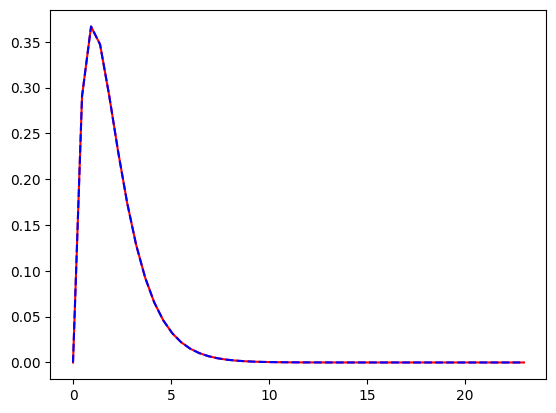

In [79]:
# phi(X) plotted with fit, showing very small error
X = np.linspace(start=0,stop=L,num=51)
F = [fit(x) for x in X]
plt.plot(X,F,"r",X,phi(X),"b--")

In [80]:
# numerical overlap computation
overlap_estimate = np.dot(c, np.dot(overlap_matrix, c))
ke_integral = np.dot(c, np.dot(ke_matrix, c))
angular_ke_integral = np.dot(c, np.dot(angular_ke_matrix, c))
pe_integral = np.dot(c, np.dot(pe_matrix, c))

ke_approx = ke_integral / overlap_estimate
pe_approx = pe_integral / overlap_estimate
angular_ke_approx = angular_ke_integral / overlap_estimate

energy_approx = ke_approx + angular_ke_approx + pe_approx
print(overlap_estimate, ke_integral, angular_ke_integral, pe_integral)
print(ke_approx, angular_ke_approx, pe_approx, energy_approx)

0.2499999999999986 0.12499999999999258 0.0 -0.25000000000001144
0.4999999999999731 0.0 -1.0000000000000513 -0.5000000000000782


In [81]:
def energy(c):
    overlap_integral = np.dot(c, np.dot(overlap_matrix, c))
    ke_integral = np.dot(c, np.dot(ke_matrix, c))
    pe_integral = np.dot(c, np.dot(pe_matrix, c))
#    angular_ke_integral = np.dot(c, np.dot(angular_ke_matrix, c))
    return (ke_integral + pe_integral) / overlap_integral

In [82]:
def gradient(c):
    h_matrix = ke_matrix + pe_matrix # + angular_ke_matrix
    integral = np.dot(h_matrix - energy(c) * overlap_matrix, c)
    overlap_integral = np.dot(c, np.dot(overlap_matrix, c))
#    print(energy(c) * overlap_matrix, overlap_integral, integral, h_matrix)
    return 2 * integral / overlap_integral

In [83]:
# this finds all eigenstates possible... first one is ground state
scipy.linalg.eigh(ke_matrix + pe_matrix, overlap_matrix, eigvals_only=True)

array([-1.87806476e+01, -3.41475424e-01, -1.02248964e-01, -5.14551408e-02,
       -1.91514721e-02,  4.32656753e-02,  1.29072282e-01,  2.35982122e-01,
        3.63160039e-01,  5.10162899e-01,  6.76723277e-01,  8.62666998e-01,
        1.06787398e+00,  1.29225750e+00,  1.53575239e+00,  1.79830797e+00,
        2.07988363e+00,  2.38044598e+00,  2.69996693e+00,  3.03842237e+00,
        3.39579129e+00,  3.77205503e+00,  4.16719688e+00,  4.58120225e+00,
        5.01405792e+00,  5.46574218e+00,  5.93624286e+00,  6.42581753e+00,
        6.93483429e+00,  7.46690521e+00,  8.02722967e+00,  8.65385072e+00,
        9.35708987e+00,  1.02053260e+01,  1.12273142e+01,  1.24711509e+01,
        1.41645041e+01,  1.59441173e+01,  1.88479265e+01,  2.15479047e+01,
        2.73277810e+01,  3.13736469e+01,  4.37506719e+01,  5.08106882e+01,
        8.57022232e+01,  9.82902826e+01,  2.34646669e+02,  2.70343178e+02,
        2.28077232e+03,  2.47497011e+03])

In [84]:
gradient(c)

array([-4.00000001,  3.99999999, -4.00000001,  3.99999999, -4.00000001,
        3.99999999, -4.00000001,  3.99999999, -4.00000001,  3.99999999,
       -4.00000001,  3.99999999, -4.00000001,  3.99999999, -4.00000001,
        3.99999999, -4.00000001,  3.99999999, -4.00000001,  3.99999999,
       -4.00000001,  3.99999999, -4.00000001,  3.99999999, -4.00000001,
        3.99999999, -4.00000001,  3.99999999, -4.00000001,  3.99999999,
       -4.00000001,  3.99999999, -4.00000001,  3.99999999, -4.00000001,
        3.99999999, -4.00000001,  3.99999999, -4.00000001,  3.99999999,
       -4.00000001,  3.99999999, -4.00000001,  3.99999999, -4.00000001,
        3.99999999, -4.00000001,  3.99999999, -4.00000001,  3.99999999])

In [85]:
np.random.seed(1000)
c0 = np.random.random(n)
result = scipy.optimize.minimize(energy, c0, jac=gradient, method="CG")
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -18.780647545715542
       x: [ 2.267e+00 -6.693e+00 ... -1.949e+00  1.874e+00]
     nit: 45
     jac: [ 8.354e-06 -3.300e-06 ... -1.990e-06 -2.432e-06]
    nfev: 136
    njev: 136


In [86]:
def conjugate_gradient(function, gradient, c0):
    p = 1
    epsilon = 1e-3 # threshold for error
    position = c0
    r = -gradient(position)
    d = r
    old_r = r

    # calculating step size
    def diff(f, x, h=1e-3):
        return (f(x+h) - f(x-h)) / (2*h)
    
    def diff_2nd(f, x, h=1e-3):
        return (diff(f, x+h) - diff(f, x-h)) / (2*h)
    
    while np.linalg.norm(r) > epsilon:
        line_function = lambda s: function(position + s * d)
        diff_line_function = diff(line_function, 0)
        diff_2nd_line_function = diff_2nd(line_function, 0)
        step_size = - diff_line_function / diff_2nd_line_function

        position += step_size * d
        old_r = r
        r = -gradient(position)
        beta = np.dot(r, r - old_r)/np.dot(old_r, old_r)
        d = r + beta * d
#        print(p, function(position), np.linalg.norm(r), step_size, diff_line_function, diff_2nd_line_function)
        p += 1
        
    return position, function(position), gradient(position)

'''
np.random.seed(2023)
c0 = np.random.random(n)
conjugate_gradient(energy, gradient, c0)
'''

'\nnp.random.seed(2023)\nc0 = np.random.random(n)\nconjugate_gradient(energy, gradient, c0)\n'

In [87]:
cc = result.x

overlap_estimate = np.dot(cc, np.dot(overlap_matrix, cc))
ke_integral = np.dot(cc, np.dot(ke_matrix, cc))
angular_ke_integral = np.dot(cc, np.dot(angular_ke_matrix, cc))
pe_integral = np.dot(cc, np.dot(pe_matrix, cc))

ke_approx = ke_integral / overlap_estimate
pe_approx = pe_integral / overlap_estimate
angular_ke_approx = angular_ke_integral / overlap_estimate

energy_approx = ke_approx + angular_ke_approx + pe_approx
print(overlap_estimate, ke_integral, angular_ke_integral, pe_integral)
print(ke_approx, angular_ke_approx, pe_approx, energy_approx)

7346.952545953678 74145.58529088588 0.0 -212126.11159153937
10.092019082350197 0.0 -28.872666628065737 -18.78064754571554


In [88]:
# integrated function that does all the calculations together
def setup(n, Z=1, epsilon=1e-6):

    roots, weights = roots_legendre(n)
    P = np.array([eval_legendre(i + 1, roots) - (-1)**(i + 1) for i in range(n + 1)])
    dP = np.zeros((n+1, n))
    dP[1] = np.ones(n)
    for i in range(2,n+1):
        dP[i] = (2*i-1) * P[i-1] + dP[i-2]
    
    overlap_matrix = np.zeros((n,n))
    for l in range (n):
        for m in range (n):
            approx_overlap = np.dot(P[l]*P[m], weights) * L * 0.5
            if abs(approx_overlap) < epsilon:
                approx_overlap = 0
            overlap_matrix[l, m] = approx_overlap

    pe_matrix = np.zeros((n, n))
    for l in range (n):
        for m in range (n):
            approx_pe = -Z * np.dot(P[l] * P[m] / (roots + 1), weights)
            if abs(approx_pe) < epsilon:
                approx_pe = 0
            pe_matrix[l, m] = approx_pe

    ke_matrix = np.zeros((n, n))
    for l in range (n):
        for m in range (n):
            approx_ke = np.dot(dP[l] * dP[m], weights) / L
            if abs(approx_ke) < epsilon:
                approx_ke = 0
            ke_matrix[l, m] = approx_ke
    
    # from exact phi
    phi = lambda r: r * (math.e)**(-Z * r)
    c_exact = np.zeros(n)
    for l in range(n):
        c_exact[l] = ((2*l+1)/2) * np.dot(phi(L * 0.5 * (roots + 1)) * P[l], weights)
    
    def energy(c):
        overlap_integral = np.dot(c, np.dot(overlap_matrix, c))
        ke_integral = np.dot(c, np.dot(ke_matrix, c))
        pe_integral = np.dot(c, np.dot(pe_matrix, c))
        return (ke_integral + pe_integral) / overlap_integral

    def gradient(c):
        h_matrix = ke_matrix + pe_matrix
        integral = np.dot(h_matrix - energy(c) * overlap_matrix, c)
        overlap_integral = np.dot(c, np.dot(overlap_matrix, c))
        return 2 * integral / overlap_integral

    np.random.seed(1000)
    c0 = np.random.random(n)
    result = scipy.optimize.minimize(energy, c0, jac=gradient, method="CG")

    return energy(c_exact), result.fun

In [89]:
setup(50)

(1468.757759395419, -0.6938898860673877)

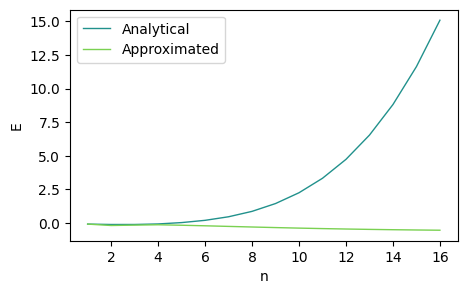

In [90]:
X = []
e_exact = []
e_approx = []

for i in range(1,17,1):
    exact, approx = setup(i)
    X.append(i)
    e_exact.append(exact)
    e_approx.append(approx)


fig, ax1 = plt.subplots(figsize=(5, 3))
ax1.set_xlabel(r'n')
ax1.set_ylabel(r'E')

colors = plt.cm.viridis([.5, .8])

p1 = ax1.plot(X, e_exact, color=colors[0], ls='-', lw=1, label='Analytical')
p2 = ax1.plot(X, e_approx, color=colors[1], ls='-', lw=1, label='Approximated')

ax1.legend(handles=p1+p2, loc='best')

plt.savefig('fig/hatom-broken.png', bbox_inches='tight', dpi=300)